  # ECE 321: Continuous-Time Signals and Systems #
 ### Spring 2025 ###
 ### Lab 5 ###
 ___________________________________________

 ### Due Date ###

Refer to the ECE 321 Laboratory Schedule for your section to determine the report due date. Submit via Canvas. </font>

 ### Description ###
The purpose of this lab is to enhance your understanding of the sampling and reconstruction of continuous-time
signals. Many signals found in practical applications are continuous in time and amplitude. If we wish to
process them with a computer, then it is necessary to sample, quantize, and code them to obtain digital signals
that are discrete in both time and amplitude. Once the continuous-time signal is sampled in time, the amplitude
of the obtained discrete-time signal is quantized, and coded to give a binary sequence that can be either stored
or processed with a computer. For the time being, we focus on the sampling process to obtain discrete-time
signals, without fully digitizing them with quantization and coding. It is the inverse relation between time and
frequency that provides the solution to the problem of how to preserve the information of a continuous-time
signal when sampled

### 3 Problem 1: Sampling without aliasing

We now use computer simulations to illustrate the sampling and reconstruction procedure. Consider sampling
a sinusoid $x(t) = cos(2\pi f_0t)$ where $f_0 = 1$ kHz. Do the following:

a) Determine the Nyquist sampling rate $f_{Nyq}$ of this signal. How fast (in sec) must this signal be sampled
to avoid aliasing?

Nyquist sampling rate: f_Nyq = 2*(f_0) = 2(1) = 2 KHz

It should be sampled in 1/f_Nuq = 1/2000 = 0.0005 sec to avoid aliasing.

b) Calculate the values of $x(nT_s)$ for $n = 0, 1, ..., 5$.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve


In [7]:
f0 = 1000   # Frequency of the original signal in Hz (1 kHz)
f_Nyq = 2*f0  # Nyquist rate
f_s = 3*f_Nyq # Sample rate set to 3 times the Nyquist rate
T_s = 1 / f_s  # Sampling period for the sampled signal
for n in range (0,6):
    x_nTs = np.cos(2 * np.pi * f0 * n* T_s)  # Sampled signal
    print (f'x(nTs)={x_nTs}')

x(nTs)=1.0
x(nTs)=0.5000000000000001
x(nTs)=-0.4999999999999998
x(nTs)=-1.0
x(nTs)=-0.5000000000000004
x(nTs)=0.49999999999999933


From the code results above:

x(0T_s) = 1


x(1T_s) = 0.5


x(2T_s) = -0.5


x(3T_s) = -1


x(4T_s) = -0.5


x(5T_s) = 0.5

c) Write down the analytical expressions for the spectra $X(j \omega)$ and $X_s(j \omega)$ of $x(t)$ and the sampled signal $x_s(t)$ (c.f. Eq. (2)), respectively. Sketch both spectra by hand.

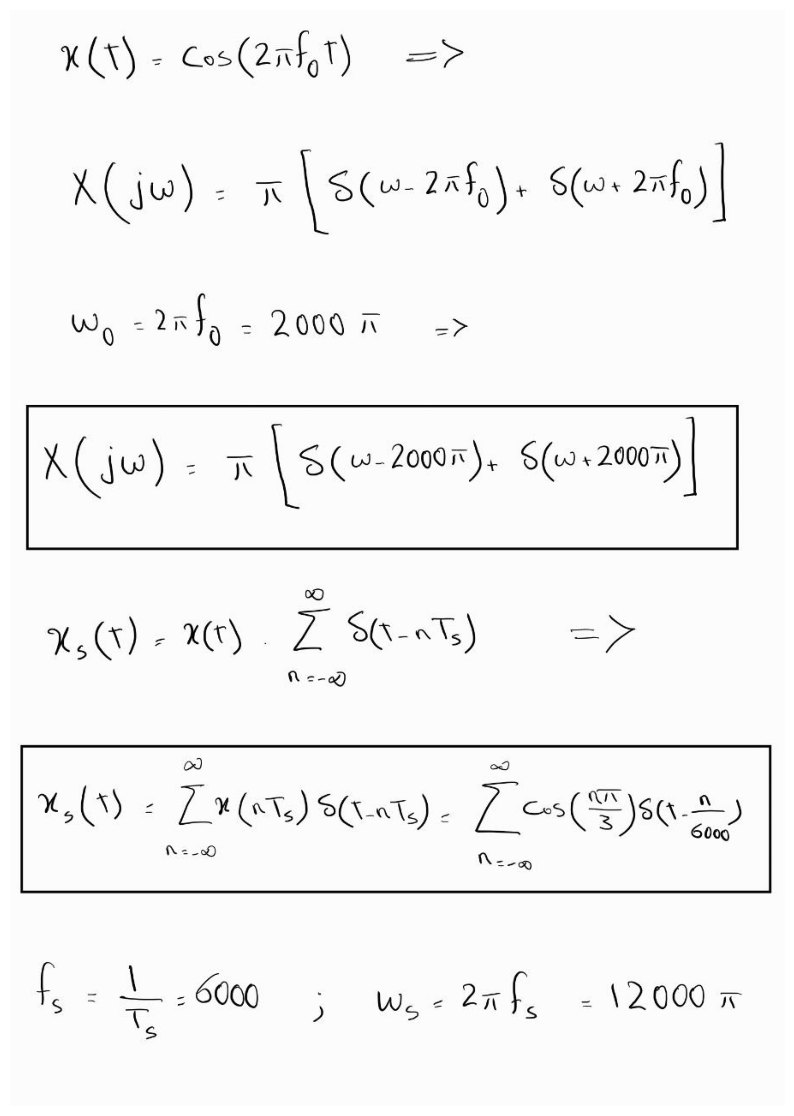

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image_path = 'C:/Users/ASUS  N551JW/Downloads/6026119483619394739.jpg'

img = mpimg.imread(image_path)
plt.figure(figsize=(10, 26))
plt.imshow(img)
plt.axis('off')
plt.show()

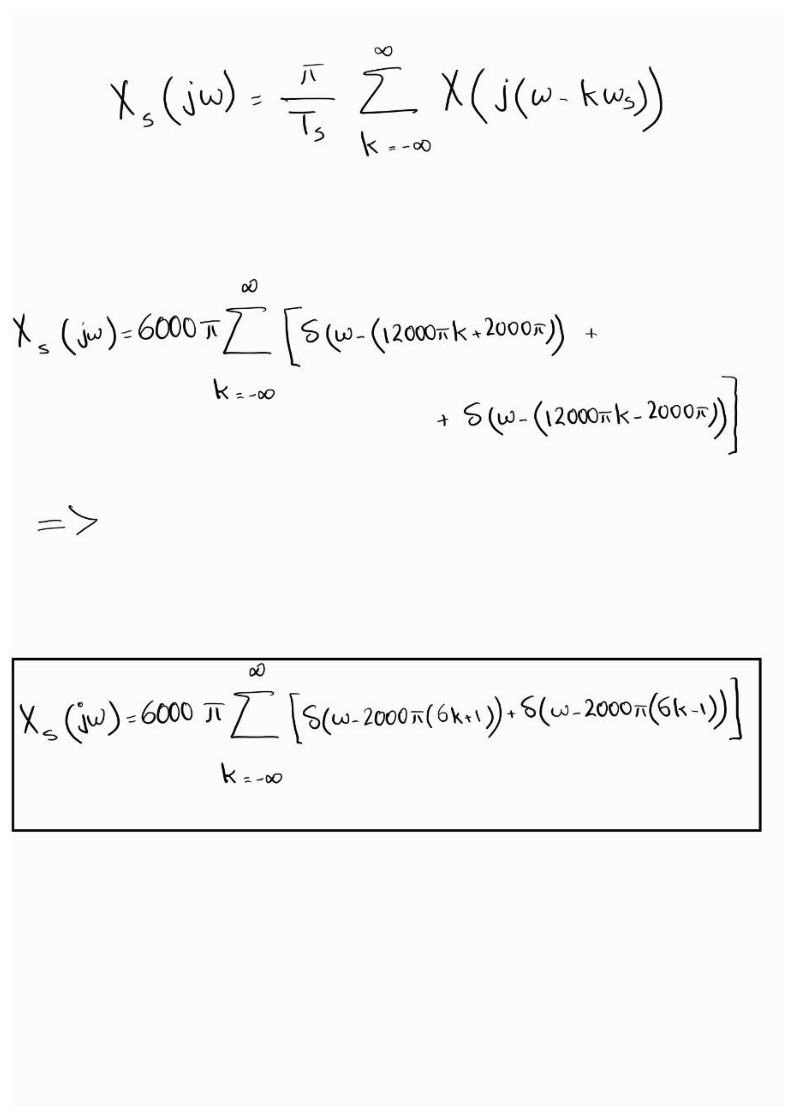

In [4]:
image_path = 'C:/Users/ASUS  N551JW/Downloads/6026119483619394743.jpg'

img = mpimg.imread(image_path)
plt.figure(figsize=(10, 26))
plt.imshow(img)
plt.axis('off')
plt.show()

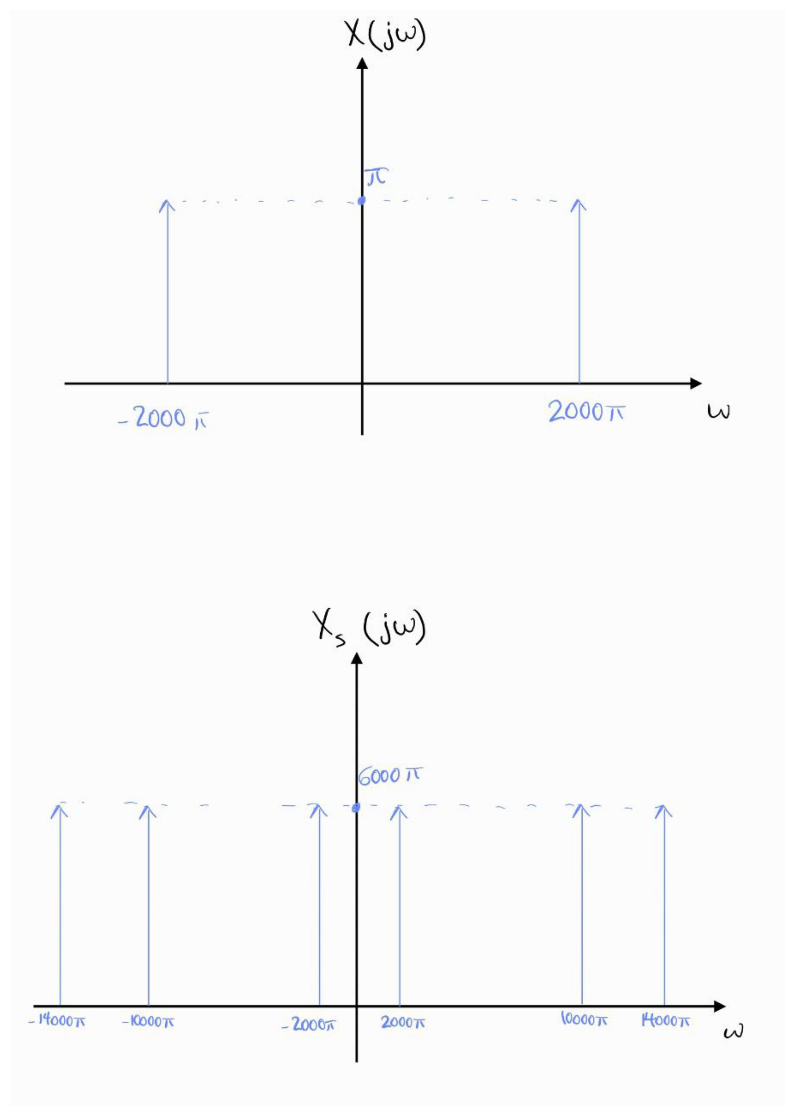

In [5]:
image_path = 'C:/Users/ASUS  N551JW/Downloads/6026119483619394744.jpg'

img = mpimg.imread(image_path)
plt.figure(figsize=(10, 26))
plt.imshow(img)
plt.axis('off')
plt.show()

d) Set the sample rate to be $f_s = 3f_{Nyq}$. Plot both the sampled signal $x_s(t)$ and the original $x(t)$ on the
same axes using different linstyles, similar to Figure 1.
Note from Lab 1 that it is often necessary to sample a signal at a rate significantly higher than the Nyquist
rate in order to make a sinusoidal plot look like a continuous-time signal. For the purpose of plotting x(t)
as a continuous-time signal we choose a sampling period $T_{sim} = 0:5 \times 10^{−4}$ sec/sample or a sampling
frequency $f_{sim} = 20,000$ samples/sec. This sampling rate $f_{sim}$ is used for plotting a CT signal, which
is different from the sampling rate $f_s$ used for preserving the signal information in discrete time. Pictures are added sepeartedly.

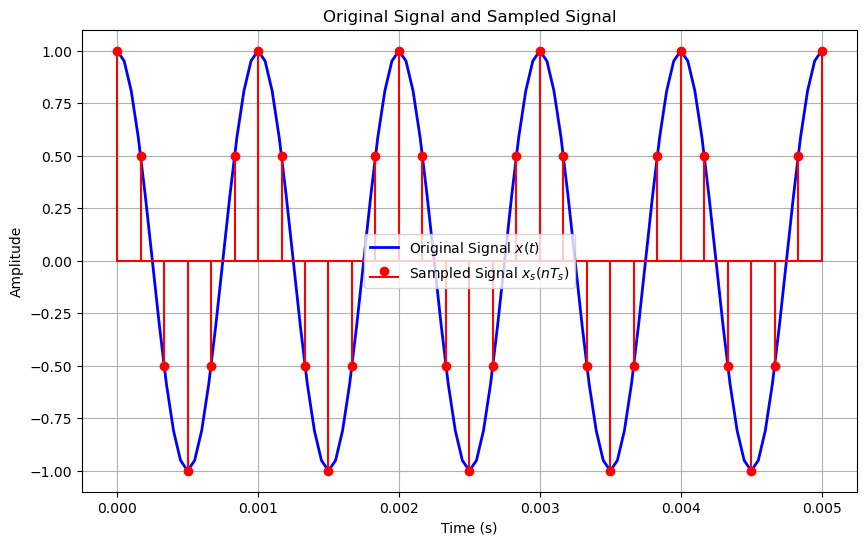

In [8]:
f0 = 1000
f_Nyq = 2 * f0
f_s = 3 * f_Nyq
T_s = 1 / f_s

f_sim = 20000
T_sim = 1 / f_sim

t_sim = np.linspace(0, 0.005, int(0.005 / T_sim) + 1)
t_s = np.arange(0, 31) * T_s

x_t = np.cos(2 * np.pi * f0 * t_sim)
x_s = np.cos(2 * np.pi * f0 * t_s)

plt.figure(figsize=(10, 6))
plt.plot(t_sim, x_t, label='Original Signal $x(t)$', linestyle='-', linewidth=2, color='blue')
plt.stem(t_s, x_s, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal $x_s(n T_s)$')
plt.title('Original Signal and Sampled Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

e) Plot the sample-weighted sinc waveforms $y_n(t) = x(nT_s)sinc\frac{t−nT_s}{T_s}$ versus time $t$, for $n = 0, 1, ..., 5$, all in one figure. Choose the range of t so that the waveforms are informative. Use different linestyles
and show the legend. Do they bear similarity with $x(t)$?

No, the individual sinc waveforms do NOT resemple the original wave form, x(t), as they are localized pulses.

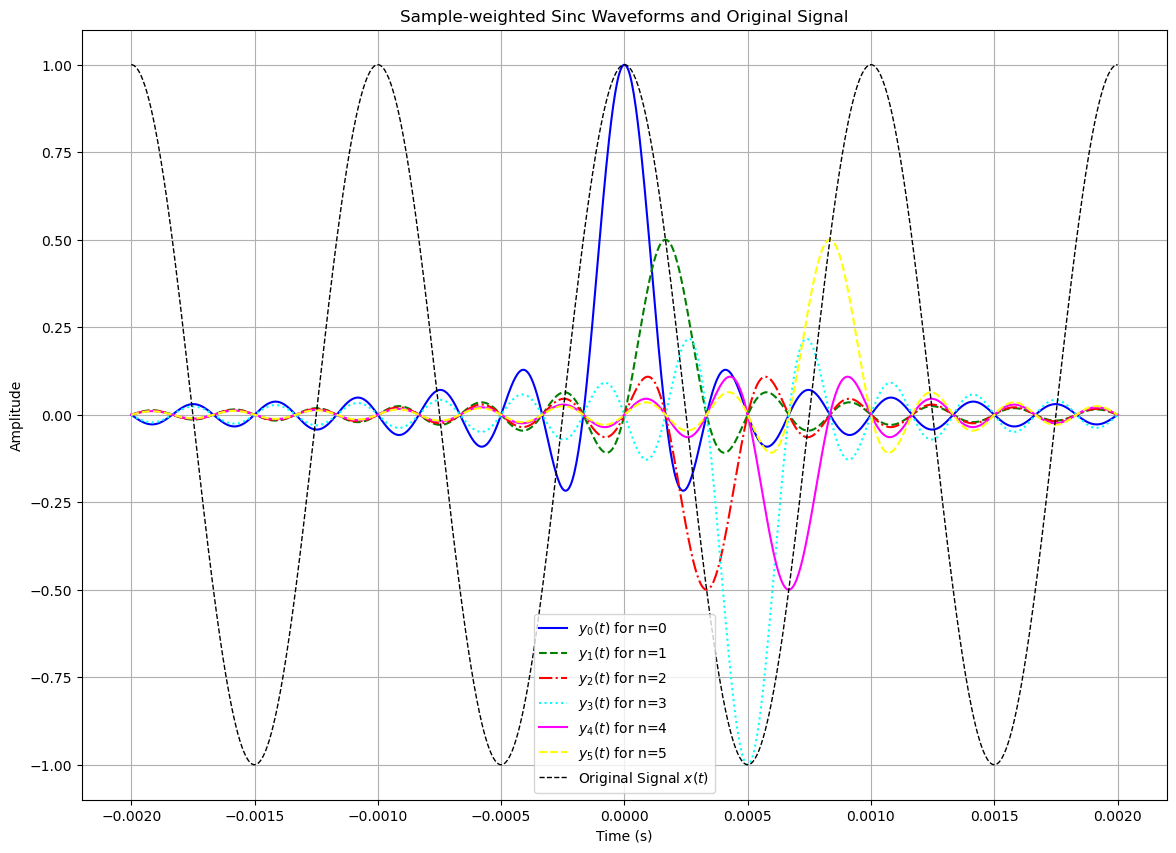

In [9]:
t_sim = np.linspace(-0.002, 0.002, 1000)

def x(t):
    return np.cos(2 * np.pi * f0 * t)

n_samples = np.arange(0, 6)
x_samples = x(n_samples * T_s)

plt.figure(figsize=(14, 10))

linestyles = ['-', '--', '-.', ':', '-', '--']
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

for i, n in enumerate(n_samples):
    u = (t_sim - n * T_s) / T_s
    y_n_t = x_samples[n] * np.sinc(u)
    plt.plot(t_sim, y_n_t, label=f'$y_{n}(t)$ for n={n}',
             linestyle=linestyles[i], color=colors[i])

plt.plot(t_sim, x(t_sim), label='Original Signal $x(t)$', 
         color='black', linewidth=1, linestyle='--')

plt.title('Sample-weighted Sinc Waveforms and Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

f) Plot the sinc interpolation output $\hat{x}_r(t)$ in Equation (4) for $N = 3, 5, 11$, respectively, in one figure. Do they look like $x(t)$?


The sinc interpolation outputs for N=3,5,11 increasingly resemble x(t) since for N=3 it's a poor match with significant errors.


For N=5,it's better but still imperfect.

For N=11,  it's nearly identical to x(t) near the center which confirms that sinc interpolation effectively reconstructs bandlimited signals. We expect that the approximation improve with more terms.

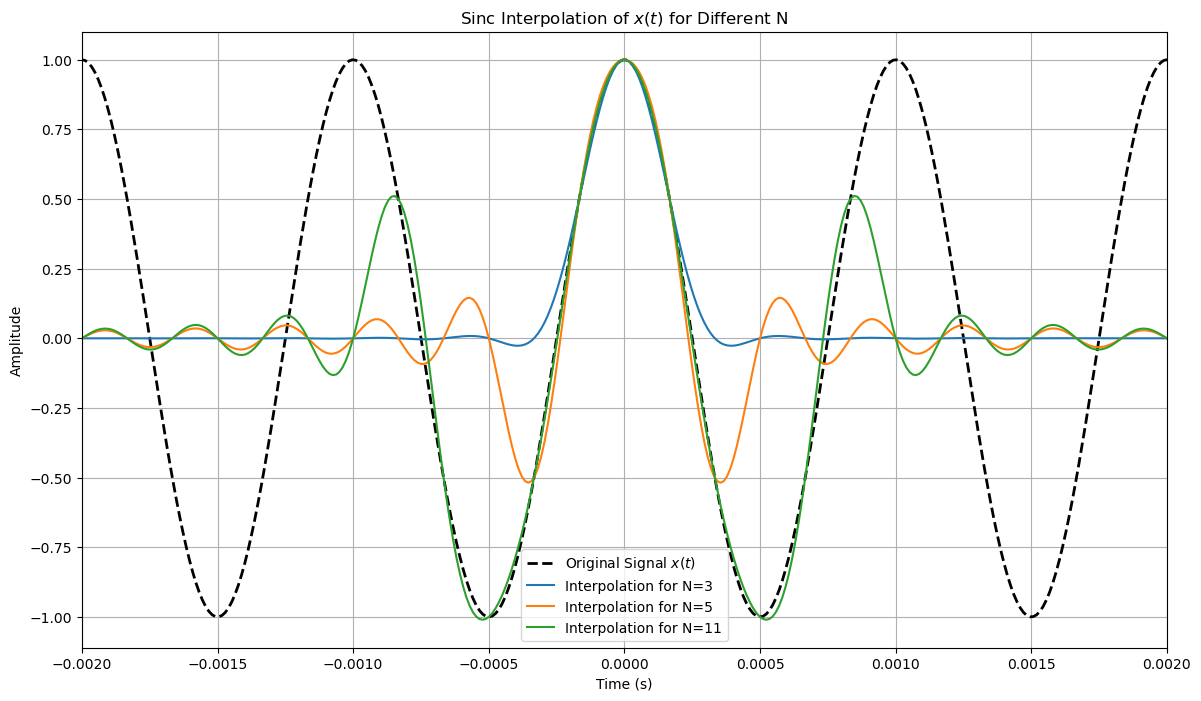

In [10]:
def sinc_interpolation(t, n_samples, T_s, x_samples):
    x_r = np.zeros_like(t)
    for i, n in enumerate(n_samples):
        u = (t - n * T_s) / T_s
        x_r += x_samples[i] * np.sinc(u)
    return x_r

t_sim = np.linspace(-0.006, 0.006, 1000)


plt.figure(figsize=(14, 8))
plt.plot(t_sim, x(t_sim), label='Original Signal $x(t)$', 
         color='black', linestyle='--', linewidth=2)

for N in [3, 5, 11]:
    n_samples = np.arange(-(N-1)//2, (N-1)//2 + 1)
    t_samples = n_samples * T_s
    x_samples = x(t_samples)
    x_r = sinc_interpolation(t_sim, n_samples, T_s, x_samples)
    plt.plot(t_sim, x_r, label=f'Interpolation for N={N}')

plt.title('Sinc Interpolation of $x(t)$ for Different N')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(-0.002, 0.002)
plt.grid(True)
plt.show()

### 4 Problem 2. Sampling with aliasing

Consider sampling the same sinusoid $x(t) = cos(2\pi f_0t)$ where $f_0 = 1$ kHz. We now set the sample rate to be
$f_s = 800$ samples/sec.

a) Derive the recovered signal ${x}_r(t)$ from the DAC analytically (c.f. Figure 7.4 in the textbook). Is it the
same as $x(t)$?



Given a sinusoid signal
$x(t) = \cos(2\pi f_0 t)$
where $f_0 = 1$ kHz, and setting the sample rate to be $f_s = 800$ samples/sec, we explore the implications for the recovered signal $\hat{x}_r(t)$ through the process of Digital-to-Analog Conversion (DAC).

- $x(t) = \cos(2\pi f_0 t)$ where $f_0 = 1$ kHz
- Sampling rate, $f_s = 800$ Hz


Aliasing occurs because $f_s < 2f_0$, implying that the sampled signal cannot uniquely represent frequencies above $f_s/2$. The alias frequency $f_{alias}$ for the original $f_0 = 1000$ Hz signal, when sampled at 800 Hz, can be determined as
$f_{alias} = |f_s - f_0| = 800 - 1000 = 200 \text{ Hz}$
However, frequency being a magnitude, the alias appears at 200 Hz in the positive frequency domain.

Therefore, the recovered signal $\hat{x}_r(t)$ using DAC will not be the same as the original $x(t)$. Instead, it will manifest as a cosine wave at the aliased frequency:
$\hat{x}_r(t) = \cos(2\pi \times 200 \times t)$

Python code can be utilized to visualize the original $x(t)$, the sampled signal, and the recovered signal $\hat{x}_r(t)$ to illustrate the effect of aliasing.




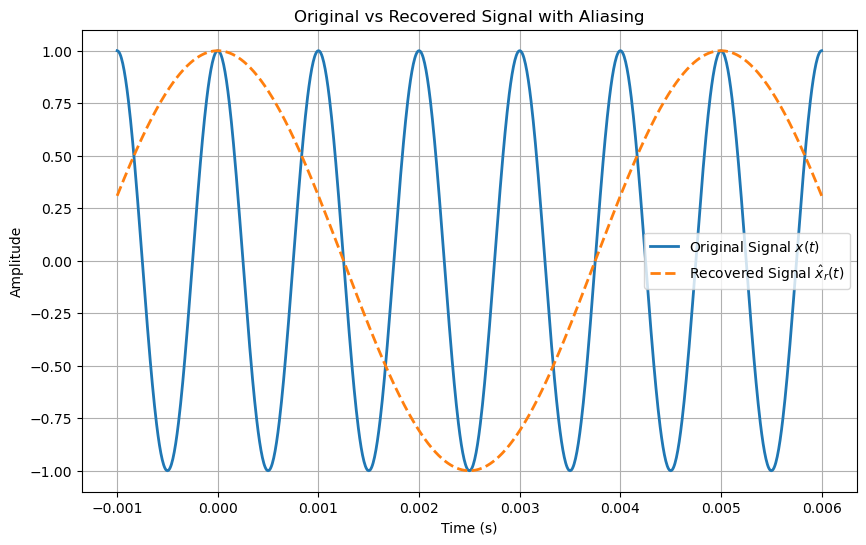

In [11]:
f0 = 1000  # original frequency in Hz
fs = 800  # sampling rate in Hz
f_alias = 200  # aliased frequency in Hz
T = 1 / fs  # sampling period in seconds
t = np.linspace(-0.001, 0.006, 1000)  # time vector for plotting

# Signals
x_t = np.cos(2 * np.pi * f0 * t)  # original signal
x_r_t = np.cos(2 * np.pi * f_alias * t)  # recovered (aliased) signal

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='Original Signal $x(t)$', linestyle='-', linewidth=2)
plt.plot(t, x_r_t, label='Recovered Signal $\hat{x}_r(t)$', linestyle='--', linewidth=2)
plt.title('Original vs Recovered Signal with Aliasing')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


b) Repeat b) - f) in Part 3. Does the derived ${x}_r(t)$ look like the simulated sinc-intepolation output $\hat{x}_r(t)$?

The recovered signal after sampling at 800 Hz and reconstructing with a DAC is not the same as the original 1 kHz sinusoidas due to aliasing, the reconstructed signal is a 200 Hz sinusoid.

b) Calculate the values of $x(nT_s)$ for $n = 0, 1, ..., 5$.

In [12]:
f_s = 800  # Sample rate set to 3 times the Nyquist rate
T_s = 1 / f_s  # Sampling period for the sampled signal
for n in range (0,6):
    x_nTs = np.cos(2 * np.pi * f0 * n* T_s)  # Sampled signal
    print (f'x(nTs)={x_nTs}')

x(nTs)=1.0
x(nTs)=3.061616997868383e-16
x(nTs)=-1.0
x(nTs)=8.578717400397356e-16
x(nTs)=1.0
x(nTs)=6.859879017134943e-15


c) Write down the analytical expressions for the spectra $X(j \omega)$ and $X_s(j \omega)$ of $x(t)$ and the sampled signal $x_s(t)$ (c.f. Eq. (2)), respectively. Sketch both spectra by hand.

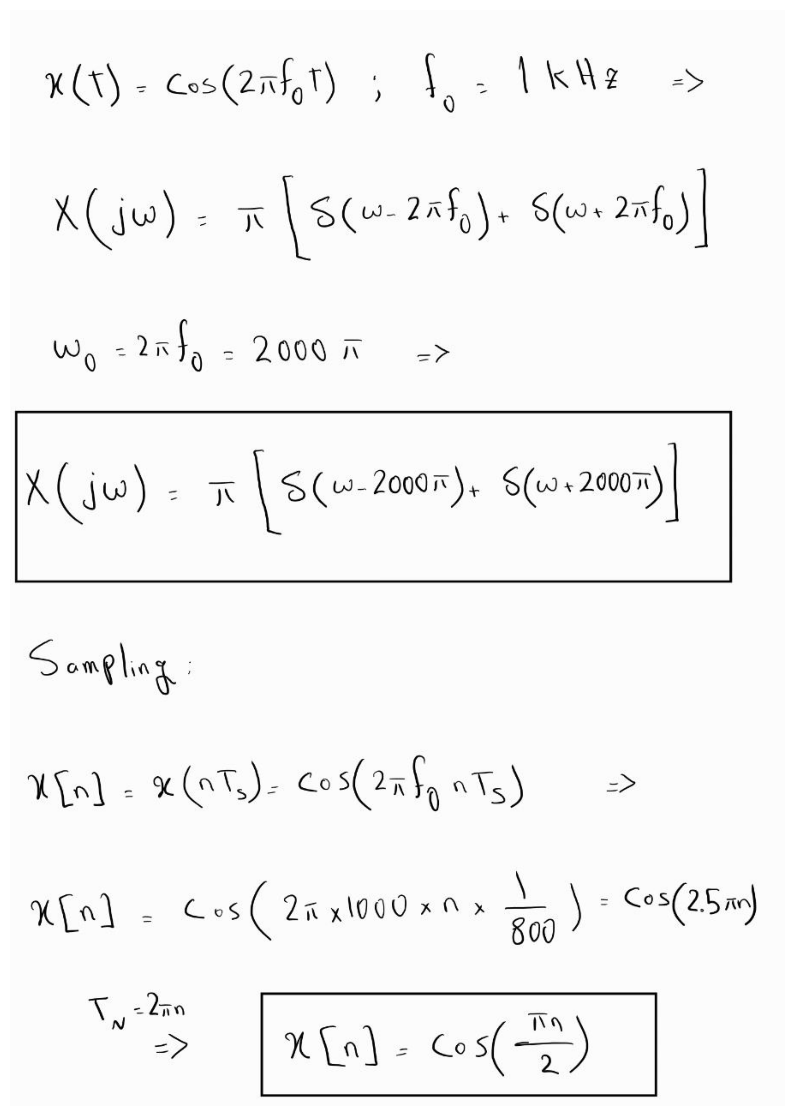

In [14]:
image_path = 'C:/Users/ASUS  N551JW/Downloads/6026119483619394751.jpg'

img = mpimg.imread(image_path)
plt.figure(figsize=(10, 26))
plt.imshow(img)
plt.axis('off')
plt.show()

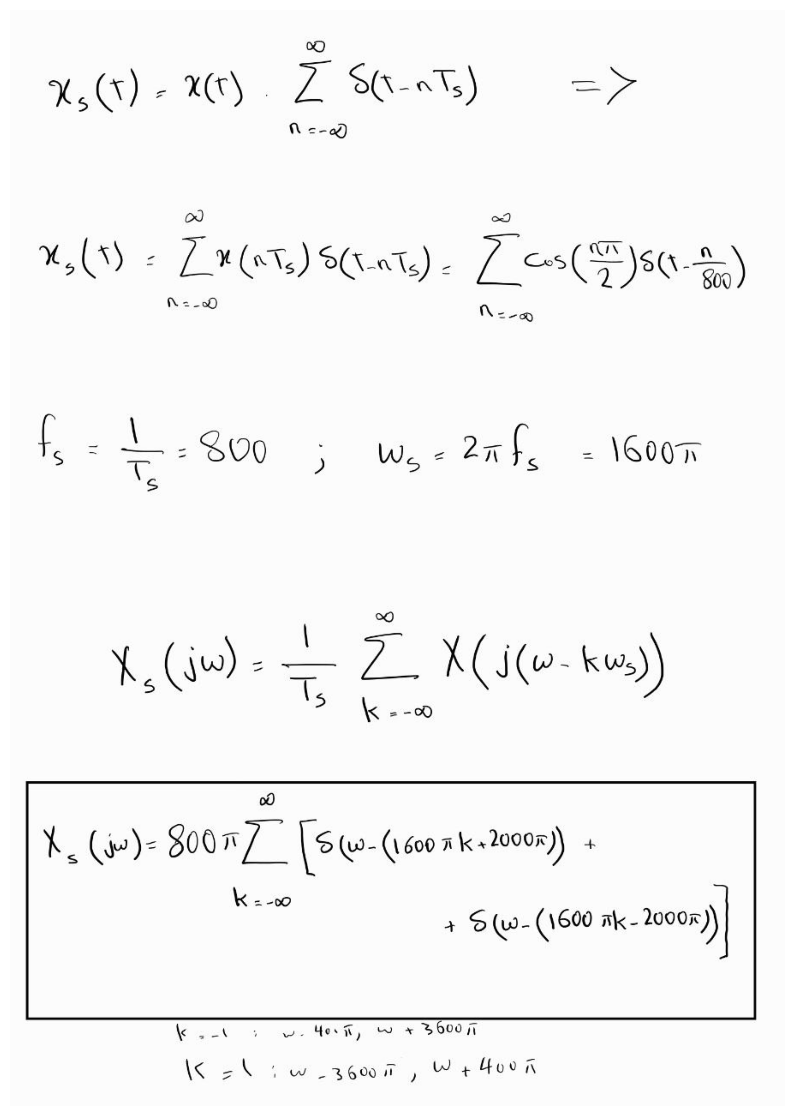

In [15]:
image_path = 'C:/Users/ASUS  N551JW/Downloads/6026119483619394752.jpg'

img = mpimg.imread(image_path)
plt.figure(figsize=(10, 26))
plt.imshow(img)
plt.axis('off')
plt.show()

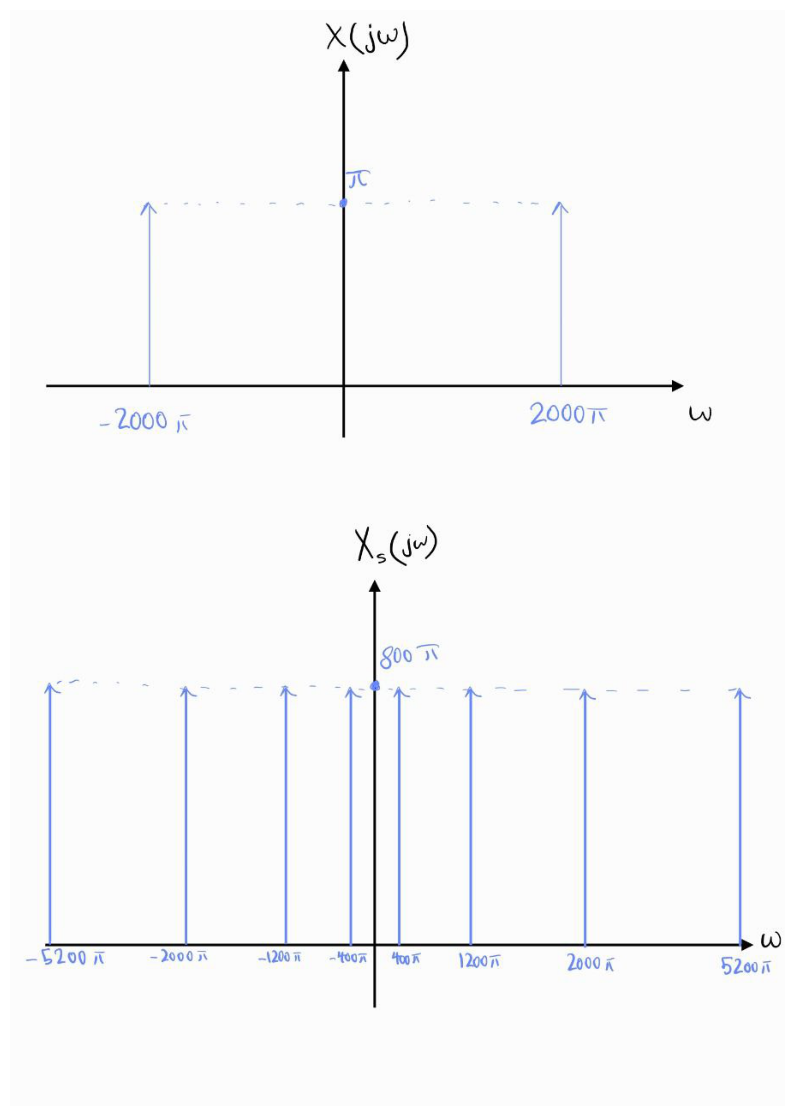

In [17]:
image_path = 'C:/Users/ASUS  N551JW/Downloads/6026119483619394753.jpg'

img = mpimg.imread(image_path)
plt.figure(figsize=(10, 26))
plt.imshow(img)
plt.axis('off')
plt.show()

 Same analysis works for this problem as well. Picture of the Fourier transforms are added sepeartedly.

d) Set the sample rate to be $f_s = 800$ Hz. Plot both the sampled signal $x_s(t)$ and the original $x(t)$ on the
same axes using different linstyles, similar to Figure 1.

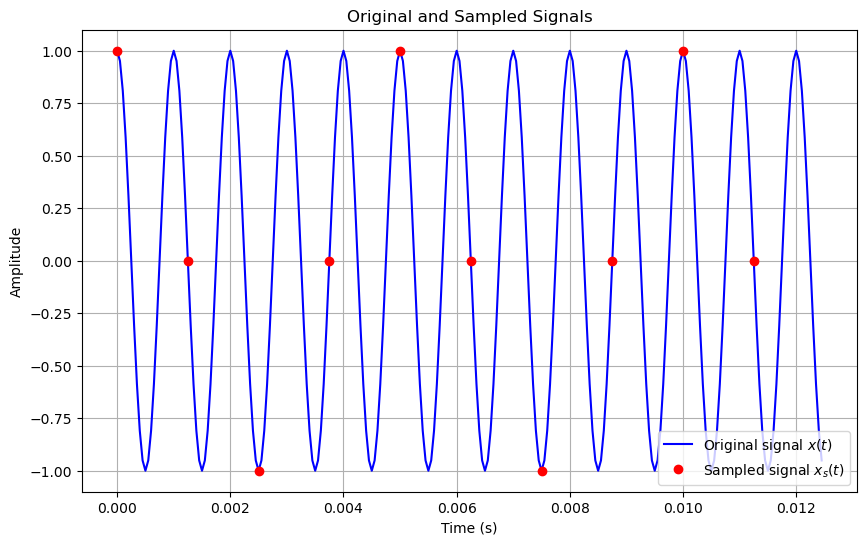

In [18]:

fs = 800   # Sample rate set to 3 times the Nyquist rate
T_s = 1 / fs  # Sampling period for the sampled signal

# For plotting the continuous-time signal
f_sim = 20000  # Simulation sampling frequency for plotting (20 kHz)
T_sim = 1 / f_sim  # Simulation sampling period

T_end = 0.0125

# Time vectors
t_sim = np.arange(0, T_end, T_sim)  # Time vector for plotting the continuous signal
t_s = np.arange(0, T_end, T_s)      # Time vector for the sampled signal

x_t = np.cos(2 * np.pi * f0 * t_sim)
x_s = np.cos(2 * np.pi * f0 * t_s)

plt.figure(figsize=(10, 6))
plt.plot(t_sim, x_t, 'b-', label='Original signal $x(t)$')
plt.plot(t_s, x_s, 'ro', label='Sampled signal $x_s(t)$') 
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original and Sampled Signals')
plt.legend()
plt.grid(True)
plt.show()

e) Plot the sample-weighted sinc waveforms $y_n(t) = x(nT_s)sinc\frac{t−nT_s}{T_s}$ versus time $t$, for $n = 0, 1, ..., 5$, all in one figure. Choose the range of t so that the waveforms are informative. Use different linestyles
and show the legend. Do they bear similarity with $x(t)$?

No, they do Not resemple x(t) indvidually.

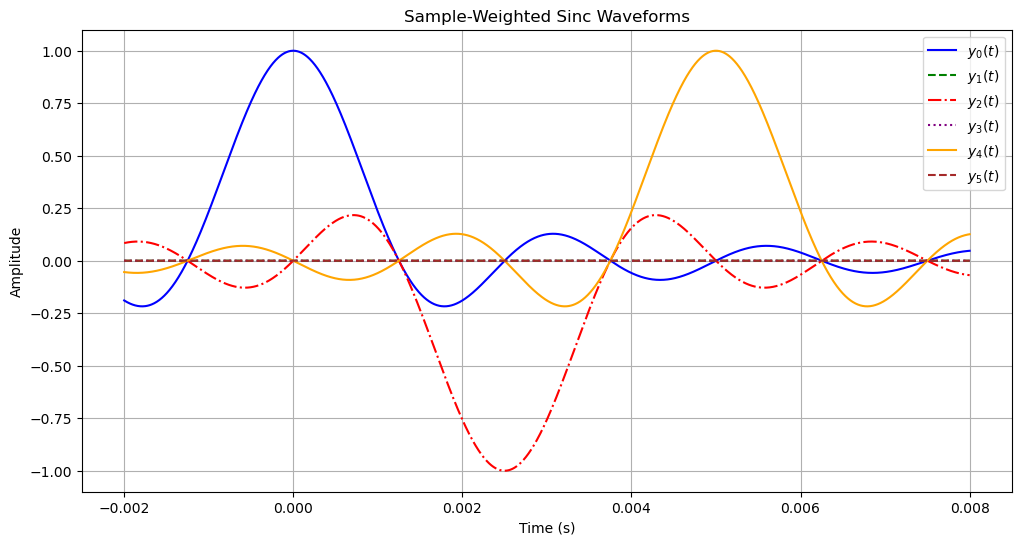

In [19]:
# Define the time vector for plotting
t = np.linspace(-0.002, 0.008, 2000)

n_values = np.arange(0, 6)
x_nTs = np.cos(np.pi / 2 * n_values)

def sinc_func(u):
    return np.where(u == 0, 1.0, np.sin(np.pi * u) / (np.pi * u))

plt.figure(figsize=(12, 6))
linestyles = ['-', '--', '-.', ':', '-', '--']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

for n in n_values:
    u = (t - n * T_s) / T_s
    y_n = x_nTs[n] * sinc_func(u)
    plt.plot(t, y_n, linestyle=linestyles[n], color=colors[n], label=f'$y_{n}(t)$')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sample-Weighted Sinc Waveforms')
plt.legend()
plt.grid(True)
plt.show()

f) Plot the sinc interpolation output $\hat{x}_r(t)$ in Equation (4) for $N = 3, 5, 11$, respectively, in one figure. Do they look like $x(t)$?

No, they do not look like x(t)

C:\Users\ASUS  N551JW\AppData\Local\Temp\ipykernel_13984\3019772769.py:8: RuntimeWarning: invalid value encountered in divide
  return np.where(u == 0, 1.0, np.sin(np.pi * u) / (np.pi * u))


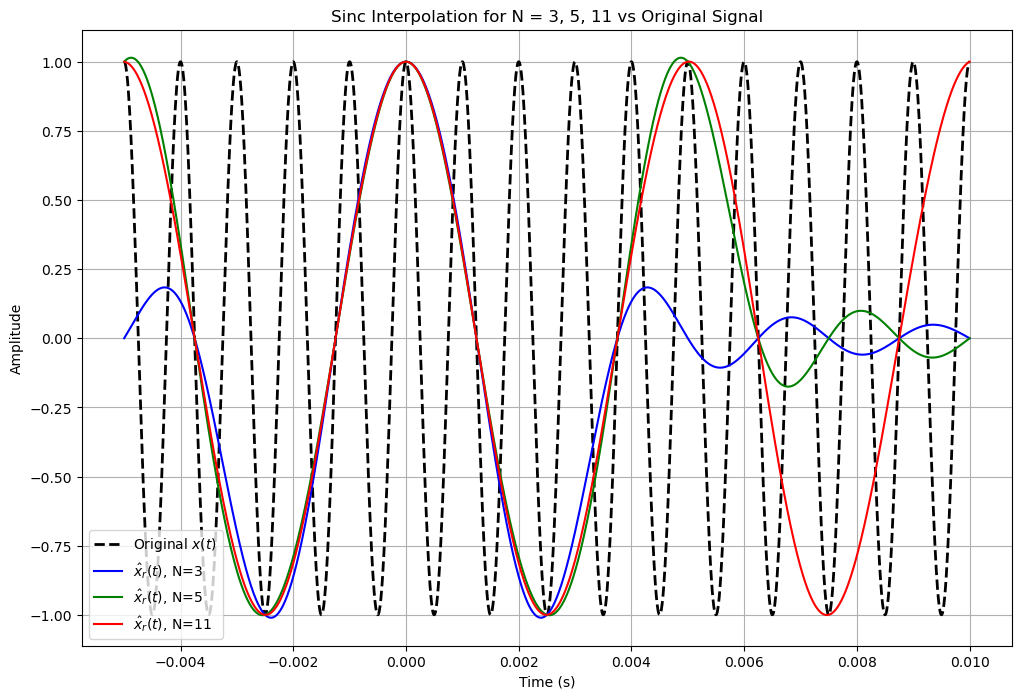

In [20]:
N_values = [3, 5, 11]

t = np.linspace(-0.005, 0.01, 2000)

# Original signal
x_t = np.cos(2 * np.pi * f0 * t)

n_max = max(N_values)
n = np.arange(-n_max, n_max + 1)
x_nTs = np.cos(np.pi / 2 * n)

plt.figure(figsize=(12, 8))
plt.plot(t, x_t, 'k--', label='Original $x(t)$', linewidth=2)

colors = ['blue', 'green', 'red']
for idx, N in enumerate(N_values):
    x_r_t = np.zeros_like(t)
    for n_val in range(-N, N + 1):
        u = (t - n_val * T_s) / T_s
        x_r_t += x_nTs[n_val + n_max] * sinc_func(u)
    plt.plot(t, x_r_t, color=colors[idx], label=f'$\\hat{{x}}_r(t)$, N={N}')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sinc Interpolation for N = 3, 5, 11 vs Original Signal')
plt.legend()
plt.grid(True)
plt.show()

### Problem 3 Sampling Rectangular Signal

Consider sampling a rectangular signal $x(t) = u(t + 2) − u(t − 2)$.

a) We would like to employ an anti-aliasing filter $h_a(t)$ such that the filter output $x_a(t) = x(t)$ ? $h_a(t)$
retains $98.9%$ of the energy of $x(t)$. Determine the cutoff frequency $\omega_M$ of this filter.
Hint: Note that $x(t)$ of interest is a time-scaled version of $x_0(t)$ in the above example. Hence, you may
use the results of $x_0(t)$ and relevant time-scaling properties to figure out the value of $\omega_M$ for $x(t)$, without having to do numerical evaluation of the integral shown in the example.

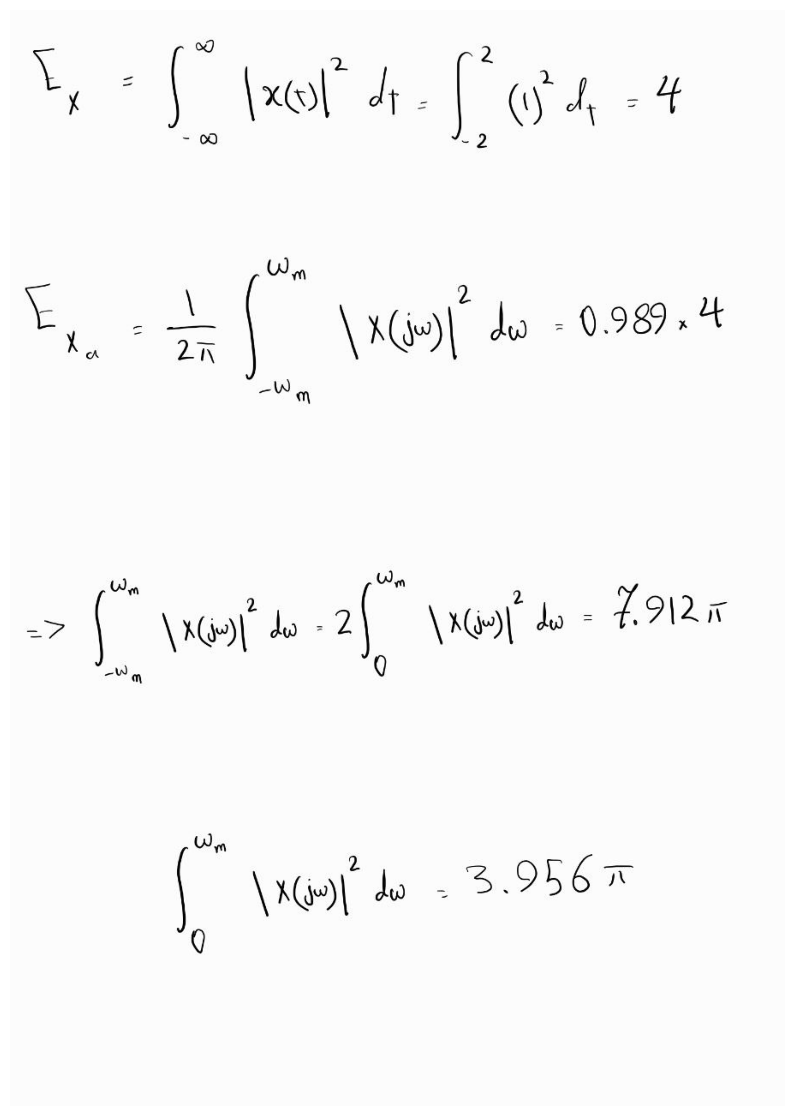

In [21]:
image_path = 'C:/Users/ASUS  N551JW/Downloads/6026119483619394756.jpg'

img = mpimg.imread(image_path)
plt.figure(figsize=(10, 26))
plt.imshow(img)
plt.axis('off')
plt.show()

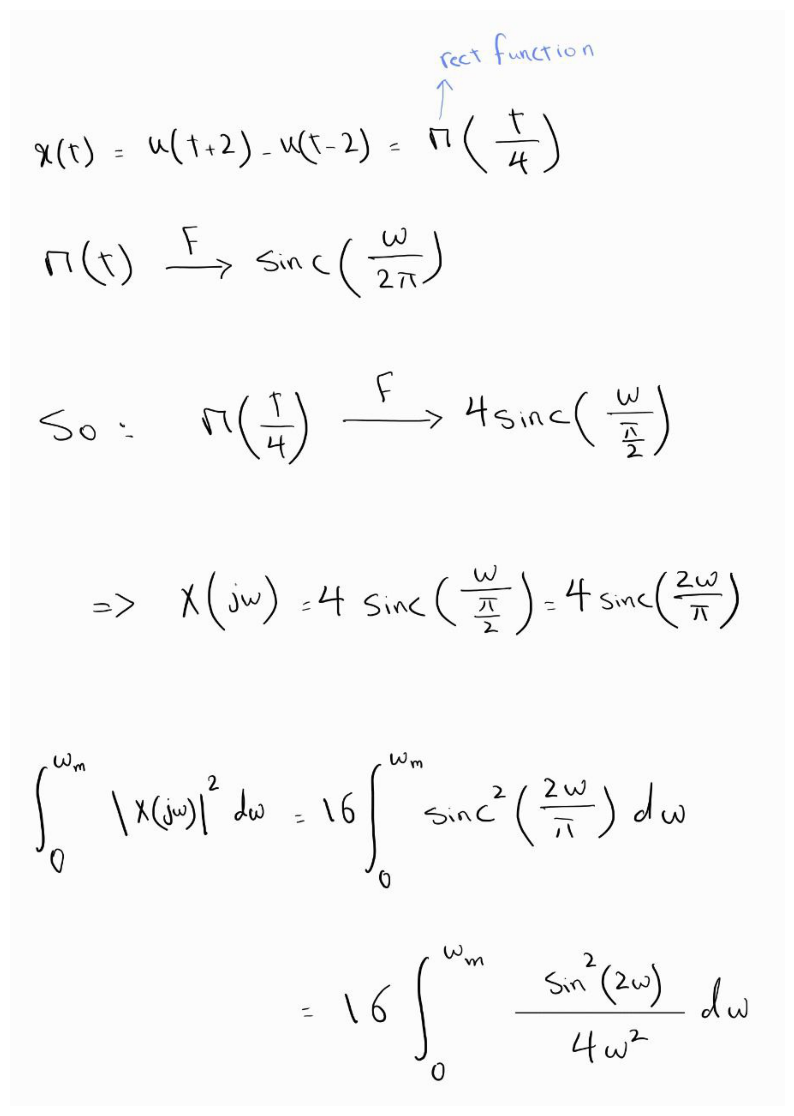

In [22]:
image_path = 'C:/Users/ASUS  N551JW/Downloads/6026119483619394757.jpg'

img = mpimg.imread(image_path)
plt.figure(figsize=(10, 26))
plt.imshow(img)
plt.axis('off')
plt.show()

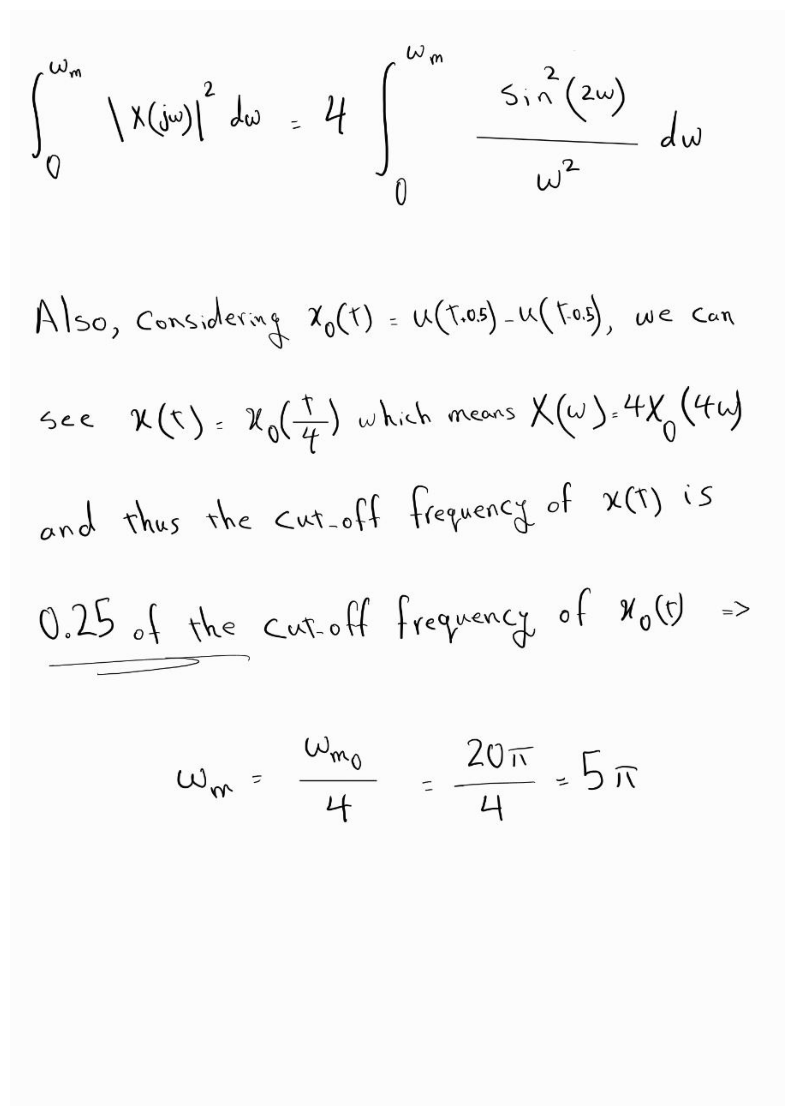

In [25]:
image_path = 'C:/Users/ASUS  N551JW/Downloads/6026119483619394760.jpg'

img = mpimg.imread(image_path)
plt.figure(figsize=(10, 26))
plt.imshow(img)
plt.axis('off')
plt.show()

b) Write down the analytical expression for the identified $h_a(t)$. Note that it is an ideal LPF.

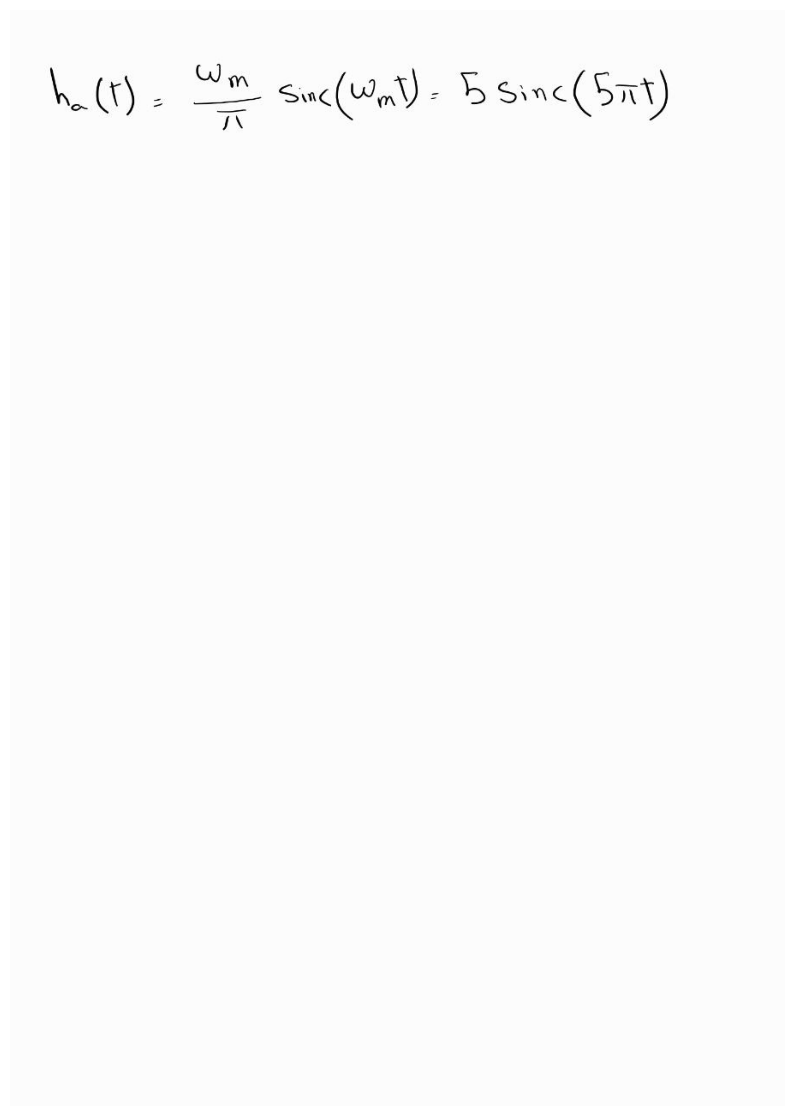

In [26]:
image_path = 'C:/Users/ASUS  N551JW/Downloads/6026119483619394761.jpg'

img = mpimg.imread(image_path)
plt.figure(figsize=(10, 26))
plt.imshow(img)
plt.axis('off')
plt.show()

c) Determine the Nyquist rate of $x_a(t)$ and set it as the sampling rate $f_s$ for processing $x_a(t)$.

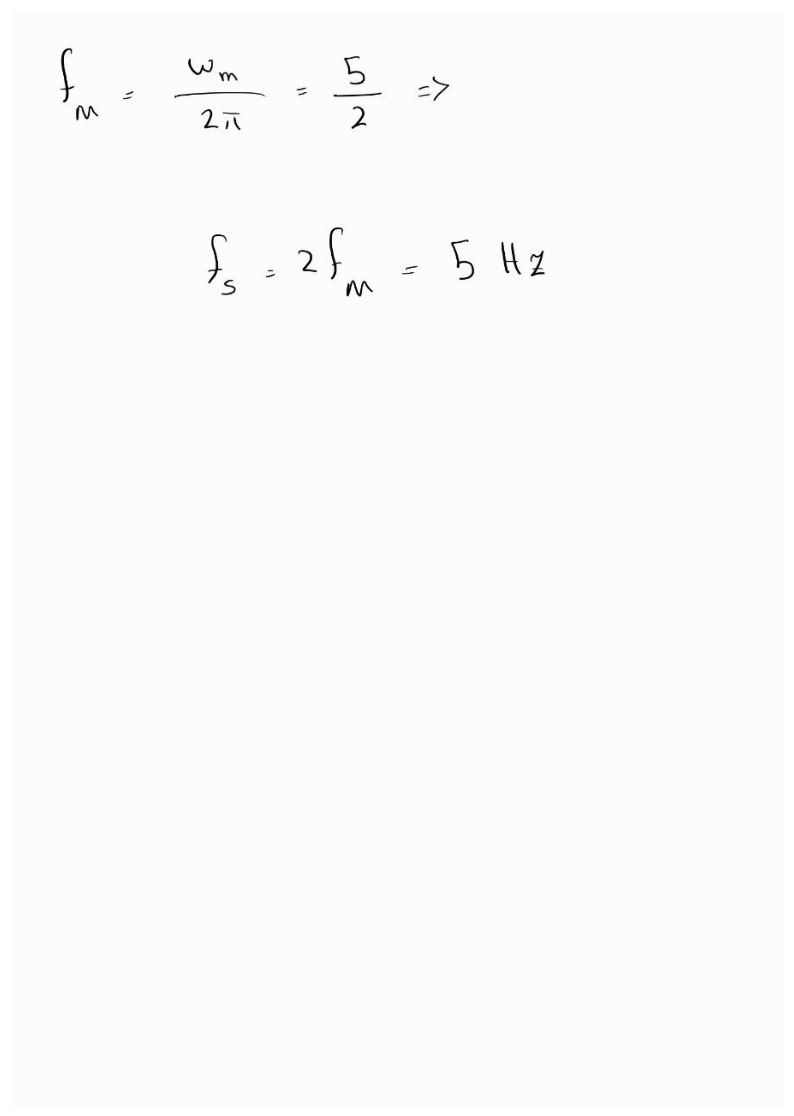

In [27]:
image_path = 'C:/Users/ASUS  N551JW/Downloads/6026119483619394762.jpg'

img = mpimg.imread(image_path)
plt.figure(figsize=(10, 26))
plt.imshow(img)
plt.axis('off')
plt.show()

d) Use Python to generate $x_a(t)$ through the convolution $x_a(t) = x(t)* h_a(t)$. Use the identified sampling
rate $f_s$ to generate the sampled signal $x_s(t)$ from $x_a(t)$. What are the sample values $x_s(nT_s)$ for $n =
0, 1, ..., 5$?

Sample values x_s(nT_s) for n = 0, 1, ..., 5:
x_s(0T_s) = 0.9802
x_s(1T_s) = 1.0200
x_s(2T_s) = 0.9794
x_s(3T_s) = 1.0217
x_s(4T_s) = 0.9765
x_s(5T_s) = 1.0262


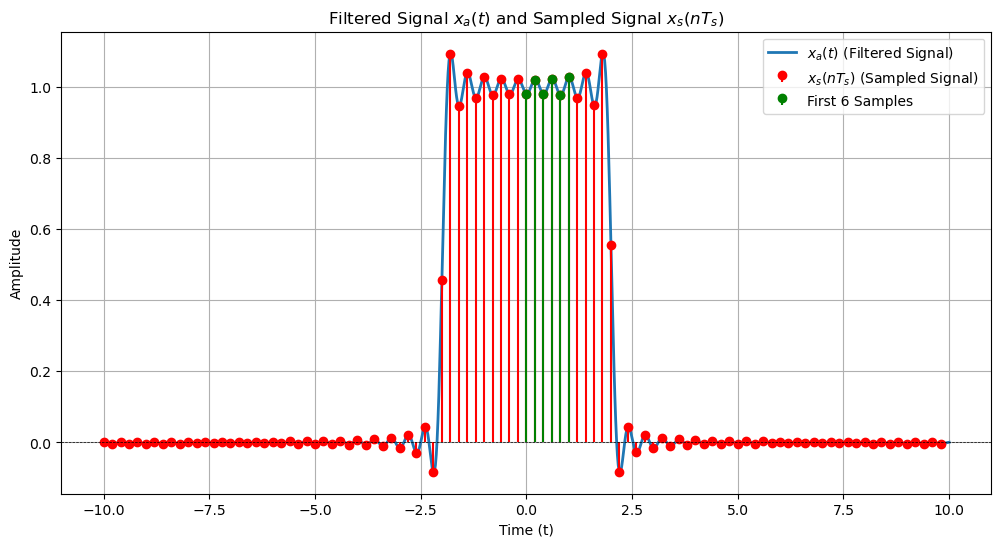

In [30]:
from scipy.signal import convolve

def x(t):
    return np.where(np.abs(t) <= 2, 1, 0)

omega_M = 5*np.pi

def h_a(t):
    return (omega_M / np.pi) * np.sinc(omega_M * t / np.pi)

f_s = 5
T_s = 1 / f_s

t_continuous = np.linspace(-10, 10, 1000)
t_sampled = np.arange(-10, 10, T_s)

x_t = x(t_continuous)
h_a_t = h_a(t_continuous) 
x_a_t = convolve(x_t, h_a_t, mode='same') * (t_continuous[1] - t_continuous[0])

x_a_sampled = np.interp(t_sampled, t_continuous, x_a_t)

# First 6 sample values
n_values = np.arange(6) 
sample_times = n_values * T_s
sample_values = np.interp(sample_times, t_sampled, x_a_sampled)

print("Sample values x_s(nT_s) for n = 0, 1, ..., 5:")
for n, val in zip(n_values, sample_values):
    print(f"x_s({n}T_s) = {val:.4f}")

plt.figure(figsize=(12, 6))

plt.plot(t_continuous, x_a_t, label='$x_a(t)$ (Filtered Signal)', linewidth=2)

plt.stem(t_sampled, x_a_sampled, linefmt='r-', markerfmt='ro', basefmt=' ', label='$x_s(nT_s)$ (Sampled Signal)')

plt.stem(sample_times, sample_values, linefmt='g-', markerfmt='go', basefmt=' ', label='First 6 Samples')

plt.title("Filtered Signal $x_a(t)$ and Sampled Signal $x_s(nT_s)$")
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

e) Similar to Problem 1.e), plot the sample-weighted sinc waveforms $y_n(t) = x_s(nT_s)sinc\frac{t−nT_s}{T_s}$
versus time $t$, for $n = 0, 1, ..., 5$, all in one figure. Choose the range of $t$ so that the waveforms are
informative. Use different linestyles and show the legend. Do they bear similarity with $x(t)$?

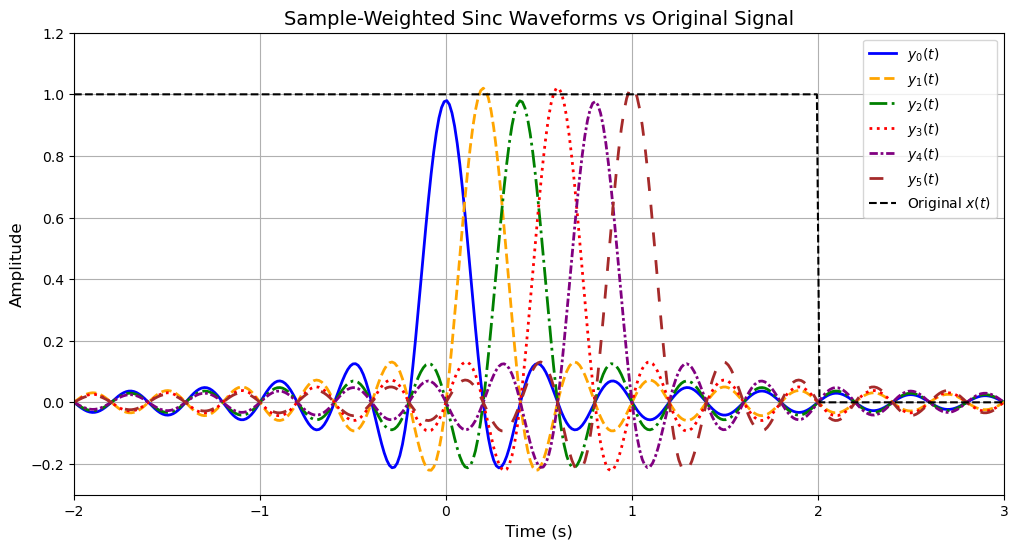

In [37]:
n_values = np.arange(0, 6)   # Sample indices (n = 0, 1, ..., 5)
x_samples = np.array([0.9802, 1.0200,  0.9794, 1.0217, 0.9765, 1.0217])

t = np.linspace(-2, 12, 1000)

def y_n(t, n, T_s, x_sample):
    return x_sample * np.sinc((t - n * T_s) / T_s)

linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 5))]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

plt.figure(figsize=(12, 6))

for n in n_values:
    y = y_n(t, n, T_s, x_samples[n])
    label = f'$y_{n}(t)$' if x_samples[n] != 0 else None 
    if label:
        plt.plot(t, y, linestyle=linestyles[n], color=colors[n], linewidth=2, label=label)

x_original = np.where(np.logical_and(t >= -2, t <= 2), 1, 0)
plt.plot(t, x_original, 'k--', linewidth=1.5, label='Original $x(t)$')

plt.title('Sample-Weighted Sinc Waveforms vs Original Signal', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.legend()
plt.grid(True)
plt.xlim([-2, 3])
plt.ylim([-0.3, 1.2])
plt.show()

None of these weighted signals are similar to the original signal, but their summation (explored in the nex part) might be similar to the original signal , $x(t)$.

f) Plot the sinc interpolation output $\hat{x}_r(t)$ in Equation (4) for $N = 11$. On the same figure, plot both $x_a(t)$ and $x(t)$. Use different linestyles for these three signals and include the legend. What do you observe?

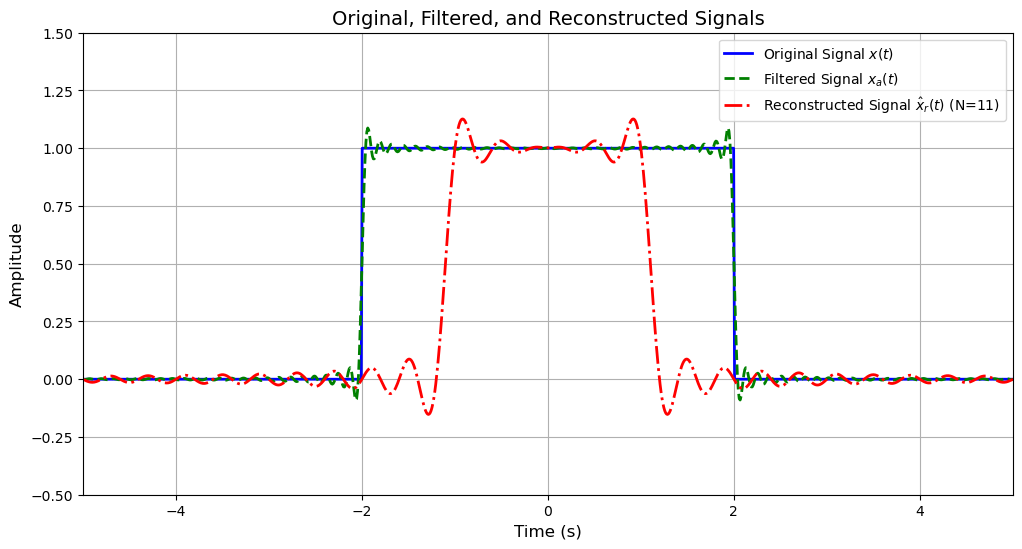

In [49]:
N = 11

t_highres = np.linspace(-5, 5, 10000)
t_plot = np.linspace(-5, 5, 1000)

x_t = np.where(np.abs(t_highres) <= 2, 1, 0)

ha_t = 5 * np.sinc(5*np.pi*t_highres)

x_a_t = convolve(x_t, ha_t, mode='same') / np.sum(ha_t) 

# Sample x_a(t) at n*T_s for n = -5 to 5 (11 samples)
n_samples = np.arange(-5, 6)
t_samples = n_samples * T_s
sample_indices = np.searchsorted(t_highres, t_samples)
x_sampled = x_a_t[sample_indices]

# Sinc interpolation function
def x_r(t, T_s, samples, n_values):
    reconstructed = np.zeros_like(t)
    for i, n in enumerate(n_values):
        reconstructed += samples[i] * np.sinc((t - n * T_s) / T_s)
    return reconstructed

x_r_t = x_r(t_plot, T_s, x_sampled, n_samples)

x_t_plot = np.where(np.abs(t_plot) <= 2, 1, 0)
x_a_t_plot = np.interp(t_plot, t_highres, x_a_t)

plt.figure(figsize=(12, 6))
plt.plot(t_plot, x_t_plot, 'b-', linewidth=2, label='Original Signal $x(t)$')
plt.plot(t_plot, x_a_t_plot, 'g--', linewidth=2, label='Filtered Signal $x_a(t)$')
plt.plot(t_plot, x_r_t, 'r-.', linewidth=2, label='Reconstructed Signal $\hat{x}_r(t)$ (N=11)')

plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.title('Original, Filtered, and Reconstructed Signals', fontsize=14)
plt.legend(loc='upper right')
plt.xlim(-5, 5)
plt.ylim(-0.5, 1.5)
plt.grid(True)
plt.show()

Selecting an appropriate value for $N$, the reconstructed signal $\hat{x}_r(t)$ closely approximates the original signal.

## ECE 321 Lab 5 Check-Off Sheet

Name: <br>
Lab Section: <br>



Briefly describe how you chose the sampling frequency in Problem 3.

It was chosen based on the Nyquist criterion to ensure that aliasing does not occur; fs = 2*(f_M)

For Problem 2, show the TA your reconstructed signal both analytically and via simulations. Explain
why they differ from the original signal x(t).


Because it still reconstructs the aliased signal and the sampling rate was too low to capture the original frequency.


For Problem 3, show the TA your reconstructed signal $\hat{x}_r(t)$, the filtered signal $x_a(t)$ and the original
signal $x(t)$. If one signal is an approximated version of another signal, then explain what causes the
approximation. What do you think of the dilemma: are realistic signals bandlimited or not?

The filtered signal of x_a(t) is an approximation of x(t) because the low-pass filter removes high-frequency components. This causes x_a(t) to lose to sharp transitions of x(t).


The reconstructed signal x_r (t) approximates x_a(t) but sinc interpolation introduces small errors due to the finite number of sinc terms N=11.

Casuses of approximation can be Low Pass Filtering, sinc interpolation and sampling itself.


Realistic signals are NOT truly bandlimited since they contain infinite frequency components but are approximated as bandlimited because frequencies above a certain threshold are negligible in terms of energy.


TA signature and date: <br>
TA comments: <br>